# Getting newspaper data from COCA corpus

In [33]:
import pandas as pd
import zipfile
import re
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# set filepath
COCA = "/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/"
newspapers_path = COCA + 'text_newspaper_lsp.zip'
newspapers_path

'/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/text_newspaper_lsp.zip'

## Getting texts

In [3]:
def get_newspaper_df(newspapers_path, topic_filter):    
    # get all text
    newspapers_data = load_newspapers(newspapers_path)    
    all_news = []
    [all_news.extend(newspapers_data[k]) for k in newspapers_data.keys()]
        
    # load into dataframe
    df = pd.DataFrame(all_news, columns=['text'])
    # get text_ids
    df['text_id'] = df.apply(lambda x: get_textid(x), axis=1)

    df['text'] = df.apply(lambda x: x['text'].decode('utf-8', errors='ignore'), axis=1)
    df = df[df['text'].str.contains(topic_filter)]
    df.set_index('text_id', inplace=True)
    return df

def get_textid(row):
        text = row['text']
        text = text.decode('utf-8', errors='ignore')
        text_id = re.search('(?<=##)[0-9]+', text).group(0)
        return str(text_id)
    
def load_newspapers(newspapers_path):
    newspaper_raw = zipfile.ZipFile(newspapers_path)
    newspaper_data = {}

    for file in newspaper_raw.namelist():
        newspaper_data[file] = []
        with newspaper_raw.open(file) as f:
            i=0
            for line in f:
                #skip first line of every file
                if i==0:
                    i+=1 
                    continue
                newspaper_data[file].append(line)
#    for k in newspaper_data.keys():
#        print("{}: {}".format(k, len(newspaper_data[k])))
    return newspaper_data

In [4]:
newspaper_df = get_newspaper_df(newspapers_path, '')
# total of 57037 articles

In [5]:
# try using 2 different query words - immigra and migra
immigra_newspaper_df = get_newspaper_df(newspapers_path, 'immigra')
migra_newspaper_df = get_newspaper_df(newspapers_path, 'migra')

In [6]:
immigra_newspaper_df
# 3335

text
text_id                                                   
3001109  ##3001109 <p> The people who work behind the p...
3001113  ##3001113 <p> Following are excerpts from a tr...
3001115  ##3001115 <p> It started over some plantains a...
3001128  ##3001128 <p> Sung Soo Kim , a native of South...
3001901  ##3001901 <p> Lucien Paye , head of the O.E.C....
...                                                    ...
4115318  ##4115318 For the second time in a month , the...
4115330  ##4115330 Sen. Scott Brown ( R ) of Massachuse...
4115348  ##4115348 Insights into the minds of Westerner...
4115354  ##4115354 An Obama administration announcement...
4115364  ##4115364 I am the proud son of a hardworking ...

[3335 rows x 1 columns]

In [7]:
migra_newspaper_df
# 4841

text
text_id                                                   
3001109  ##3001109 <p> The people who work behind the p...
3001113  ##3001113 <p> Following are excerpts from a tr...
3001115  ##3001115 <p> It started over some plantains a...
3001128  ##3001128 <p> Sung Soo Kim , a native of South...
3001901  ##3001901 <p> Lucien Paye , head of the O.E.C....
...                                                    ...
4115348  ##4115348 Insights into the minds of Westerner...
4115354  ##4115354 An Obama administration announcement...
4115356  ##4115356 As Syria devolves into what the UN p...
4115364  ##4115364 I am the proud son of a hardworking ...
4115371  ##4115371 A former Indian Army major placed a ...

[4841 rows x 1 columns]

## Getting metadata

In [8]:
def get_news_sources():
    cols = ['text_id', 'word_count', 'year', 'genre', 'subgen', 'source', 'title', 'publication_info']

    zfile = zipfile.ZipFile(COCA + "sources.zip")
    source = []
    for file in zfile.namelist():
        with zfile.open(file) as f:
            for line in f:
                line = line.decode('utf-8', errors='ignore').split("\t")
                if len(line)>4 and line[3] == 'NEWS':
                    print(line)
                    source.append(line)
    
    sources_df = pd.DataFrame(source, columns=cols)
    sources_df.set_index('text_id', inplace=True)
    return sources_df

In [9]:
sources_df = get_news_sources()

['3000001', '1179', '1990', 'NEWS', '141', 'NYTimes', 'Piniella Eager to Put Pinstripes Behind\r\n']
['3000002', '1153', '1990', 'NEWS', '141', 'NYTimes', 'Grand Prix Indoor Circuit Goes Down to the Finish\r\n']
['3000003', '1067', '1990', 'NEWS', '141', 'NYTimes', 'Flamingos, Palms and Silence\r\n']
['3000004', '957', '1990', 'NEWS', '141', 'NYTimes', 'Arbitration List\r\n']
['3000005', '1045', '1990', 'NEWS', '141', 'NYTimes', 'RESULTS PLUS\r\n']
['3000006', '1359', '1990', 'NEWS', '141', 'NYTimes', 'Ready to Be the Slugger of Old\r\n']
['3000007', '1717', '1990', 'NEWS', '141', 'NYTimes', 'Continually Coming Up Empty;The Nets Are Losing Games, Fans, Tempers and Respect\r\n']
['3000008', '1998', '1990', 'NEWS', '141', 'NYTimes', 'VICTORY IN LAKE PLACID;Impossible Dream Plus One Decade\r\n']
['3000009', '2494', '1990', 'NEWS', '141', 'NYTimes', 'A Secluded Indonesian Isle\r\n']
['3000010', '1120', '1990', 'NEWS', '141', 'NYTimes', 'Overtime Favors Knicks\r\n']
['3000011', '2049', '199

['3073611', '1097', '1990', 'NEWS', '135', 'WashPost', 'Bush^s Mixed Signals Reflect 2 Opposing GOP Budget Strategies', 'FIRST SECTION; PAGE A6\r\n']
['3073612', '1001', '1990', 'NEWS', '135', 'WashPost', 'GOP Senate Recruiting May Cost Party in House;<BR>Formerly ^Safe^ Seats Could Fall to Democrats', 'FIRST SECTION; PAGE A20\r\n']
['3073613', '1110', '1990', 'NEWS', '135', 'WashPost', 'Ed Norton^s Tax Role An Enigma;<BR>Candidate^s Spouse Called Meticulous', 'METRO; PAGE B1\r\n']
['3073614', '1113', '1990', 'NEWS', '135', 'WashPost', '12-Lane Stretch of I-270 Paves the Way Into the Next Century', 'METRO; PAGE B1\r\n']
['3073615', '962', '1990', 'NEWS', '135', 'WashPost', 'Mayoral Candidates Swap Roles ;<BR>Dixon, Turner Alter Thrust of Campaigns', 'METRO; PAGE B1\r\n']
['3073616', '1109', '1990', 'NEWS', '135', 'WashPost', 'When It^s Time to Govern, Schaefer Is All Business', 'METRO; PAGE B1\r\n']
['3073617', '2059', '1990', 'NEWS', '135', 'WashPost', 'Democracy at Work: The Tax Revo

['3046903', '1970', '1991', 'NEWS', '139', 'SanFranChron', 'Sculley Reveals His Plans To Keep Apple Growing; ', 'BUSINESS; Pg. B1\r\n']
['3046904', '1824', '1991', 'NEWS', '135', 'SanFranChron', 'New Agency Struggles With Problem; ', 'NEWS; Pg. A1\r\n']
['3046905', '1393', '1991', 'NEWS', '139', 'SanFranChron', 'Homeowners Rushing to Refinance; Bankers besieged as mortgage rates near 20-year lows; ', 'BUSINESS; Pg. B1\r\n']
['3046906', '1255', '1991', 'NEWS', '135', 'SanFranChron', 'To Refinance or Not to Refinance; There^s more to consider than just the lower rates; ', 'BUSINESS; Pg. B6\r\n']
['3046907', '1277', '1991', 'NEWS', '139', 'SanFranChron', 'New Products Help Smokers Quit; Skin patches release nicotine -- 4 firms battling <B>for</B> big market; ', 'BUSINESS; Pg. B1\r\n']
['3046908', '1448', '1991', 'NEWS', '140', 'SanFranChron', '^City of Angels^; Musical^s Songs Stuck in Purgatory; Scream-style singing, canned amplification; ', 'SUNDAY DATEBOOK; Pg. 39\r\n']
['3046909', '14

['3001262', '1678', '1993', 'NEWS', '138', 'NYTimes', 'Kidnapped Executive Is Rescued After 13 Days in Manhattan Crypt\r\n']
['3001263', '1489', '1993', 'NEWS', '138', 'NYTimes', "'Misplaced Reliance' Cited on Asbestos\r\n"]
['3001264', '1678', '1993', 'NEWS', '138', 'NYTimes', 'What? No Husband?;Single Women Join the Fight to Breach Barriers at Exclusive Country Clubs\r\n']
['3001265', '2268', '1993', 'NEWS', '138', 'NYTimes', 'Hard-Core Rap Lyrics Stir Backlash\r\n']
['3001266', '2363', '1993', 'NEWS', '138', 'NYTimes', "Bushwick's Hope Is a Public Project\r\n"]
['3001267', '2046', '1993', 'NEWS', '138', 'NYTimes', 'Where AIDS Advances, Understanding Lags;On Long Island, Patients Describe Suburban Exclusion Unmatched in Cities\r\n']
['3001268', '2274', '1993', 'NEWS', '138', 'NYTimes', 'Staten Island Secession More Than Fringe Threat\r\n']
['3001269', '1810', '1993', 'NEWS', '138', 'NYTimes', "Testing Newborns for AIDS Virus Raises Issue of Mothers' Privacy\r\n"]
['3001270', '1917', 

['3005778', '1633', '1994', 'NEWS', '139', 'NYTimes', 'Corporate Spending Booms, but Jobs Stagnate\r\n']
['3005779', '1527', '1994', 'NEWS', '139', 'NYTimes', 'In Latin America, a Free Trade Rush\r\n']
['3005780', '1471', '1994', 'NEWS', '139', 'NYTimes', 'The False Promise of Development by Casino\r\n']
['3005781', '3110', '1994', 'NEWS', '139', 'NYTimes', 'Now, Come Fly the Frenzied Skies\r\n']
['3005782', '1698', '1994', 'NEWS', '139', 'NYTimes', 'Profile;An Accountant in Ad-Land: A Survivor at the Top\r\n']
['3005783', '1434', '1994', 'NEWS', '139', 'NYTimes', "Everything's Coming Up Vanilla\r\n"]
['3005784', '2771', '1994', 'NEWS', '139', 'NYTimes', 'A Spreading Pain, and Cries for Justice\r\n']
['3005785', '1869', '1994', 'NEWS', '139', 'NYTimes', 'Profile;Dues Paid, a Hollywood Upstart Joins the Mogul Set\r\n']
['3005786', '1768', '1994', 'NEWS', '139', 'NYTimes', "Borden's Deal Draws the Ire of Shareholders\r\n"]
['3005787', '1593', '1994', 'NEWS', '139', 'NYTimes', 'The Hard F

['3028158', '1225', '1995', 'NEWS', '140', 'USAToday', "Quincy Jones packs ''Joint'' with talent", 'LIFE\r\n']
['3028160', '1197', '1995', 'NEWS', '135', 'USAToday', 'An historic, sad day in a sacred city', 'NEWS\r\n']
['3028162', '1276', '1995', 'NEWS', '141', 'USAToday', 'Weighing equality // College sports still tip scale toward men', 'SPORTS\r\n']
['3028163', '1451', '1995', 'NEWS', '141', 'USAToday', 'USA TODAY SUPER 25 HIGH SCHOOL FOOTBALL', 'SPORTS\r\n']
['3028164', '1205', '1995', 'NEWS', '139', 'USAToday', "Daiwa debacle erodes trust in Japan''s banks", 'MONEY\r\n']
['3028167', '1578', '1995', 'NEWS', '135', 'USAToday', 'Peace process could falter without Rabin', 'NEWS\r\n']
['3028168', '1183', '1995', 'NEWS', '141', 'USAToday', 'Modell turns Browns fans blue over move', 'SPORTS\r\n']
['3028169', '1358', '1995', 'NEWS', '135', 'USAToday', 'Reluctant war hero led Israel to peace', 'NEWS\r\n']
['3028171', '1154', '1995', 'NEWS', '140', 'USAToday', "The holiday punch // Movie''s 

['3042140', '1874', '1996', 'NEWS', '137', 'Atlanta', 'FOCUS ON DROUGHT IN THE HEARTLAND;There^s trouble in the fields in Texas, Oklahoma and other states in the;American heartland. As a searing drought parches the land, eerie comparisons are being drawn ', 'NATIONAL NEWS\r\n']
['3042141', '4005', '1996', 'NEWS', '141', 'Atlanta', 'OLYMPIC WEEKLY;56 DAYS;SPORTS UPDATES;EVERY SPORT EVERY WEEK;ARCHERY', 'SPORTS OLYMPICS\r\n']
['3042142', '1431', '1996', 'NEWS', '140', 'Atlanta', 'RUB IT IN;Keep ribs - and roasts, veggies - tickled', 'FOOD\r\n']
['3042143', '1205', '1996', 'NEWS', '140', 'Atlanta', 'Small-business award nominees advise would-be entrepreneurs', 'EXTRA\r\n']
['3042144', '1424', '1996', 'NEWS', '140', 'Atlanta', 'Police Roundup;Reports from DeKalb^s four precincts;Deja Vu: Mystical scam rematerializes', 'EXTRA\r\n']
['3042146', '1446', '1996', 'NEWS', '139', 'Atlanta', 'PERSONAL BUSINESS;INSIDER TRADING;Alpharetta company riding surge of Internet interest', 'BUSINESS\r\n']
[

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['3072722', '1364', '2007', 'NEWS', '138', 'Houston', 'PROUD TO SERVE; <BR>Area veteran Robert Baker works to honor local soldiers; <BR>Member of Willis American Legion plays taps at funeral services', 'THISWEEK; Pg. 3\r\n']
['3072723', '1062', '2007', 'NEWS', '135', 'Houston', 'HOUSTON GRAND OPERA; <BR>Powerful stories of immigrants finding haven here will explode in voice, revealing their heart-wrenching struggle to freedom; <BR>The journey to `The Refuge^', 'A; Pg. 1\r\n']
['3072724', '1091', '2007', 'NEWS', '138', 'Houston', 'NEIGHBORHOOD HIGH SCHOOL ROUNDUP; <BR>Football playoff spots still available; <BR>Once 0-5, Kingwood is in with a victory', 'THISWEEK; Pg. 10\r\n']
['3072725', '978', '2007', 'NEWS', '140', 'Houston', 'HOT Ticket; <BR>November 8-15', 'PREVIEW; Pg. 16\r\n']
['3072727', '1367', '2007', 'NEWS', '138', 'Houston', 'NEIGHBORHOOD HIGH SCHOOL ROUNDUP; <BR>State invites filling mailboxes; <BR>Strake harriers, Tiger spikers eager to earn title hardware', 'THISWEEK; Pg. 

['4060179', '2339', '2008', 'NEWS', '140', 'SanFranChron', 'Taking Heat For Not Cooking', 'Section D; Column 0; Dining In, Dining Out / Style Desk; Pg. 1\r\n']
['4060180', '1013', '2008', 'NEWS', '136', 'SanFranChron', 'Allies See Germany Trying Bailout With a Thimble', 'Section A; Column 0; Foreign Desk; MEMO FROM BERLIN; Pg. 12\r\n']
['4060181', '3287', '2008', 'NEWS', '140', 'SanFranChron', 'Butter Holds The Secret To Cookies That Sing', 'Section D; Column 0; Dining In, Dining Out / Style Desk; Pg. 1\r\n']
['4060182', '1102', '2008', 'NEWS', '140', 'SanFranChron', 'The Wild, Wild Doctoring in the Wild, Wild West', 'Section C; Column 0; The Arts/Cultural Desk; BOOKS OF THE TIMES; Pg. 8\r\n']
['4060183', '1207', '2008', 'NEWS', '139', 'SanFranChron', 'European Banks Tally Losses Linked to Fraud', 'Section B; Column 0; Business/Financial Desk; Pg. 1\r\n']
['4060184', '983', '2008', 'NEWS', '137', 'SanFranChron', 'Insurers Seek Presence At Health Care Sessions', 'Section A; Column 0; Na

['4076862', '1820', '2009', 'NEWS', '135', 'USAToday', 'Confidence and optimism grow in pockets of the USA; <BR>Some companies see rehiring wave', 'NEWS; Pg. 1A\r\n']
['4076863', '1422', '2009', 'NEWS', '141', 'USAToday', '19-game skid over, Lions king for a day; <BR>Tears, cheers replace jeers after first victory since ^07', 'SPORTS; Pg. 1C\r\n']
['4076864', '1035', '2009', 'NEWS', '139', 'USAToday', 'Acura ZDX hits all the right notes; <BR>Exotic, erotic and exciting despite styling compromises', 'MONEY; Pg. 6B\r\n']
['4076865', '1802', '2009', 'NEWS', '140', 'USAToday', 'Mariah finds herself in a happy place; <BR>Singer^s pleased with her album, movie and marriage', 'LIFE; Pg. 1D\r\n']
['4076866', '1579', '2009', 'NEWS', '139', 'USAToday', 'Energy jobs touch off bidding wars; <BR>States boost incentives to win solar, wind companies', 'MONEY; Pg. 1B\r\n']
['4076867', '1615', '2009', 'NEWS', '135', 'USAToday', 'Alleged terror threat seen as ^most serious^ since 9/11; <BR>Suspect bough

['4085895', '1732', '2010', 'NEWS', '135', 'Atlanta', 'Metro agencies to feds: Let us in; <BR>287(g) aims to deport illegal immigrants convicted of crimes.; <BR>Funding is blamed for limiting participation.', 'NEWS; Pg. 1A\r\n']
['4085896', '1184', '2010', 'NEWS', '141', 'Atlanta', 'Ealey^s arrest costs him one game; <BR>Georgia running back faces charges for hit-and-run accident.', 'SPORTS; Pg. 1C\r\n']
['4085897', '1778', '2010', 'NEWS', '140', 'Atlanta', 'Fall vegetables star in substantial soups; <BR>Pumpkins, squash, beans add depth.; <BR>Greens such as kale enrich dishes and make them go further.', 'FOOD &amp; DRINK; Pg. 1E\r\n']
['4085898', '1246', '2010', 'NEWS', '142', 'Atlanta', 'Atlanta^s AIDS conference: A regional and global perspective', 'OPINION; Pg. 21A\r\n']
['4085899', '1126', '2010', 'NEWS', '141', 'Atlanta', 'SEC football notes', 'SPORTS; Pg. 2C\r\n']
['4085900', '1067', '2010', 'NEWS', '141', 'Atlanta', 'ACC football notes', 'SPORTS; Pg. 4C\r\n']
['4085901', '973',

['4113701', '1045', '2011', 'NEWS', '140', 'NYTimes', 'For Wall Street Deal Makers, Sometimes It Pays to Be Bad', 'Section B; Column 0; Business/Financial Desk; DEALBOOK; Pg. 7\r\n']
['4113702', '1579', '2011', 'NEWS', '140', 'NYTimes', 'When the Family^s Foodies Visit', 'Section D; Column 0; Dining In, Dining Out / Style Desk; Pg. 1\r\n']
['4113703', '1194', '2011', 'NEWS', '140', 'NYTimes', 'If Cave Men Told Jokes, Would Humans Laugh?', 'Section C; Column 0; The Arts/Cultural Desk; BOOKS OF THE TIMES; Pg. 3\r\n']
['4113704', '1017', '2011', 'NEWS', '138', 'NYTimes', 'Fatal House Fire Linked to Embers Discarded From Fireplace', 'Section A; Column 0; Metropolitan Desk; Pg. 18\r\n']
['4113705', '2476', '2011', 'NEWS', '140', 'NYTimes', 'Albacore Roasted in a Bed of Lettuce', 'Section ; Column 0; Dining In, Dining Out / Style Desk; RECIPES FOR HEALTH; Pg.\r\n']
['4115380', '1152', '2011', 'NEWS', '140', 'Houston', 'Hollywood legend Shirley MacLaine, 77, shares her journey ;Icon to take c

['4114874', '1655', '2012', 'NEWS', '140', 'SanFranChron', 'A vision of simple, artful products; <BR>COVER STORY; <BR>Industrial designer Yves Behar melds the beautiful with the functional to produce life-altering works', 'Style; Pg. L6\r\n']
['4114875', '1727', '2012', 'NEWS', '140', 'SanFranChron', 'Trips up lazy rivers rollin^ in; <BR>CRUISING SPECIAL SECTION; <BR>Operators bulking up fleets amid flourishing demand for tours in both U.S. and Europe', 'Travel; Pg. H1\r\n']
['4114876', '964', '2012', 'NEWS', '142', 'SanFranChron', 'LETTERS TO THE EDITOR', 'Op-Ed; LETTERS TO THE EDITOR; Pg. A9\r\n']
['4114877', '1201', '2012', 'NEWS', '140', 'SanFranChron', 'The day the music died; <BR>PEOPLE; <BR>Benefit celebrates life of popular DJ Solomon Kahn, killed in car accident', 'Datebook; Pg. E1\r\n']
['4114878', '1027', '2012', 'NEWS', '139', 'SanFranChron', 'Idea has sticking power; <BR>SOCIAL NETWORKING; <BR>Pinterest photo site has huge fan base - especially women', 'Business; Pg. D1\r\

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
sources_df
#80,017 sources

word_count  year genre subgen                    source  \
text_id                                                           
3000001       1179  1990  NEWS    141                   NYTimes   
3000002       1153  1990  NEWS    141                   NYTimes   
3000003       1067  1990  NEWS    141                   NYTimes   
3000004        957  1990  NEWS    141                   NYTimes   
3000005       1045  1990  NEWS    141                   NYTimes   
...            ...   ...   ...    ...                       ...   
4198680        827  2017  NEWS   NULL         Chicago Sun-Times   
4198681       3010  2017  NEWS   NULL        Charlotte Observer   
4198682         86  2017  NEWS   NULL        Charlotte Observer   
4198683       1057  2017  NEWS   NULL             Baltimore Sun   
4198684        608  2017  NEWS   NULL  Colorado Springs Gazette   

                                                     title publication_info  
text_id                                                                      
3000001        Piniella Eager to Put Pinstripes Behind\r\n             None  
3000002  Grand Prix Indoor Circuit Goes Down to the Fin...             None  
3000003                   Flamingos, Palms and Silence\r\n             None  
3000004                               Arbitration List\r\n             None  
3000005                                   RESULTS PLUS\r\n             None  
...                                                    ...              ...  
4198680  NORMAN CHAD: Celebrating two of sports world's...             None  
4198681  Has Duke replaced Kentucky as the king of coll...             None  
4198682  Welfare check by police leads to discovery of ...             None  
4198683  Dozens of Baltimore kids plan to march in supp...             None  
4198684  Voice of the Consumer: Email appearing to come...             None  

[80017 rows x 7 columns]

## Merge text and meta data

In [11]:
# only take articles that have both text and metadata
immigra_merged_df = immigra_newspaper_df.join(sources_df, how='inner')
migra_merged_df = migra_newspaper_df.join(sources_df, how='inner')

In [12]:
all_merged_df = newspaper_df.join(sources_df, how='inner')

In [13]:
len(all_merged_df)
# total: 57,026 articles

57026

In [14]:
print(len(migra_merged_df), len(immigra_merged_df))

4841 3335


In [15]:
migra_merged_df.groupby('year').size()
# about 100-200+ articles a year, but migra gave results of bird migration, etc.

year
1990    191
1991    216
1992    183
1993    206
1994    239
1995    183
1996    224
1997    214
1998    191
1999    221
2000    193
2001    212
2002    206
2003    205
2004    215
2005    221
2006    275
2007    246
2008    222
2009    226
2010    223
2011    213
2012    116
dtype: int64

In [16]:
immigra_merged_df.groupby('year').size()
# about 100 a year

year
1990    111
1991    132
1992    118
1993    129
1994    152
1995    124
1996    155
1997    154
1998    135
1999    151
2000    138
2001    150
2002    142
2003    149
2004    158
2005    148
2006    209
2007    183
2008    161
2009    155
2010    159
2011    139
2012     83
dtype: int64

In [17]:
immigra_merged_df.groupby('year').size()/all_merged_df.groupby('year').size()*100

year
1990    3.937567
1991    4.600906
1992    4.761905
1993    5.056840
1994    6.386555
1995    5.059160
1996    6.666667
1997    6.392694
1998    5.681818
1999    6.175869
2000    6.292750
2001    7.085498
2002    6.200873
2003    6.619280
2004    7.019103
2005    6.141079
2006    8.822288
2007    6.421053
2008    5.613668
2009    5.398816
2010    5.254461
2011    4.846583
2012    5.323926
dtype: float64

## Data cleaning

Chose to use 'immigra' as the query word as it is more relevant to the research questions of identifying trends in immigration policies

In [18]:
data = immigra_merged_df.reset_index()

In [19]:
def clean_title(row):
    title = row['title']
    remove = ['\r','\n','^']
    for string in remove:
        title = title.replace(string,'')
    return title

def clean_text(row):
    text = row['text']
    text_id = row['text_id']
    remove = ['\r','\n','<p>','@','##{}'.format(text_id)]
    for string in remove:
        text = text.replace(string,'')
    return text

In [20]:
data['title'] = data.apply(lambda x: clean_title(x), axis=1)
data['text'] = data.apply(lambda x: clean_text(x), axis=1)

In [199]:
data.to_csv('data/immigra_coca_news.csv', index=False)

## Summary of Sample

Text(0.5, 1.0, "Number of articles with 'immigra' in the COCA newspaper corpus by year")

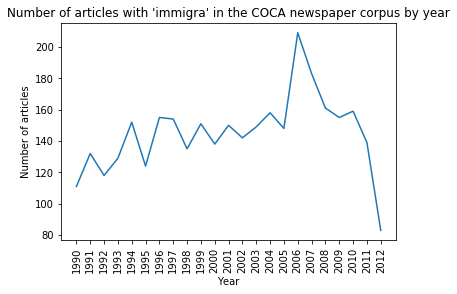

In [37]:
# Number of articles over time
plt.plot(data['year'].unique(), data.groupby('year').size())
plt.xticks(rotation=90)
plt.ylabel('Number of articles')
plt.xlabel('Year')
plt.title("Number of articles with 'immigra' in the COCA newspaper corpus by year")

Text(0.5, 1.0, "Percentage of articles with 'immigra' in the COCA newspaper corpus by year")

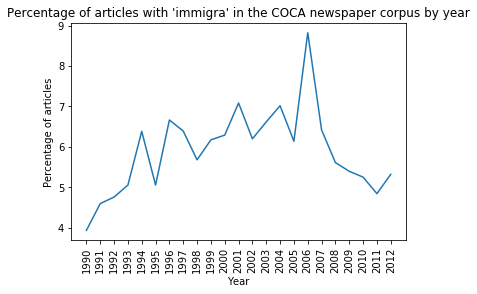

In [38]:
# Percentage of articles over time
plt.plot(data['year'].unique(), data.groupby('year').size()/all_merged_df.groupby('year').size()*100)
plt.xticks(rotation=90)
plt.ylabel('Percentage of articles')
plt.xlabel('Year')
plt.title("Percentage of articles with 'immigra' in the COCA newspaper corpus by year")

In [67]:
# Number of unique sources over time
unique_source = []
for yr in range(1990,2013):
    yr = str(yr)
    yearly = data[data['year']==yr]
    unique_source.append(len(yearly['source'].unique()))

In [77]:
unique_source[:5]

[6, 7, 9, 9, 10]

In [71]:
data['source'].unique()
# 10 in total

array(['NYTimes', 'CSMonitor', 'AssocPress', 'USAToday', 'WashPost',
       'SanFranChron', 'Atlanta', 'Houston', 'Chicago', 'Denver'],
      dtype=object)

Text(0.5, 1.0, "Number of unique news sources with 'immigra' in the COCA newspaper corpus by year")

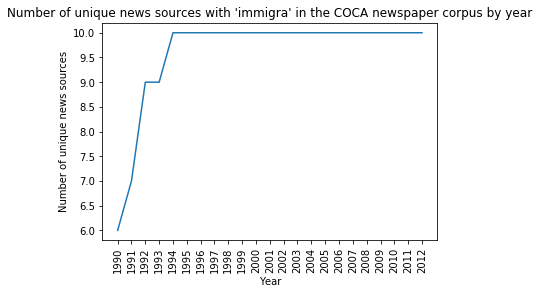

In [69]:
plt.plot(data['year'].unique(), unique_source)
plt.xticks(rotation=90)
plt.ylabel('Number of unique news sources')
plt.xlabel('Year')
plt.title("Number of unique news sources with 'immigra' in the COCA newspaper corpus by year")

In [84]:
data['word_count'] = data['word_count'].apply(int)

In [85]:
# average word count
data['word_count'].sum() / len(data)

1817.0266866566717

In [88]:
print(data['word_count'].min(), data['word_count'].max())

714 39784


In [89]:
word_count = []
for yr in range(1990,2013):
    yr = str(yr)
    yearly = data[data['year']==yr]
    word_count.append(yearly['word_count'].sum() / len(yearly))

Text(0.5, 1.0, "Average word count of newspaper articles with 'immigra' in the COCA newspaper corpus by year")

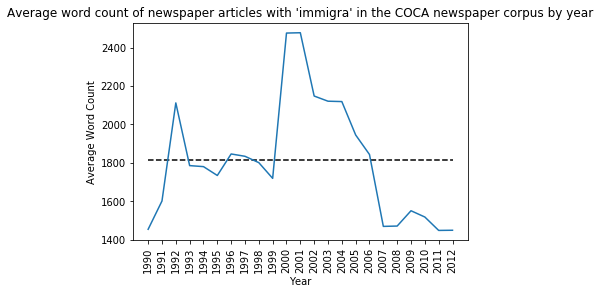

In [93]:
plt.plot(data['year'].unique(), word_count)
plt.xticks(rotation=90)
# plot average of sample
plt.hlines(data['word_count'].sum() / len(data), 0,22, linestyles='dashed')
plt.ylabel('Average Word Count')
plt.xlabel('Year')
plt.title("Average word count of newspaper articles with 'immigra' in the COCA newspaper corpus by year")